## 1. 기본 전처리 & 서울의 각 구 별 범죄율,검거율 확인

In [15]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns #다양한 색상 테마와 통계용 차트 (heatmap 사용)
import platform #맥인지 윈도우인지 파악

#matplotlib 에서 한글폰트 사용
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:
    print('error') 
    
#notebook을 실행한 브라우저에서 바로 그림을 볼 수 있음    
%matplotlib inline

#구마다의 경찰서 별로 5대 범죄정보가 있는 데이터 불러오기
df = pd.read_csv("2017년_1.csv",engine='python')

#구 별로 설정 되어있지 않고 경찰서 별로 되어있어서 변경하기위함
SeoulGu_name = {'서대문': '서대문구','강서': '강서구', '서초': '서초구','은평': '은평구', 
                '중부': '중구','혜화': '종로구', '용산': '용산구', '성북': '성북구', 
                '동대문': '동대문구', '마포': '마포구', '영등포': '영등포구', '성동': '성동구', 
                '동작': '동작구','광진': '광진구', '강북': '강북구', '금천': '금천구', 
                '중랑': '중랑구','강남': '강남구', '관악': '관악구', '강동': '강동구', 
                '구로': '구로구', '양천': '양천구', '송파': '송파구', '노원': '노원구', 
                '은평': '은평구', '도봉': '도봉구'}

#df에 구별 칼럼으로 새로 생성
df['구별'] = df['구분'].apply(lambda v: SeoulGu_name.get(v, v))

#필요없는 구분 칼럼 삭제
del df['구분'] 
    
#데이터를 쉽게 사용하기 위해 변경    
#구를 기준으로 새로운 테이블 생성
df3 = pd.pivot_table(df, index=['구별'], aggfunc=np.sum) 

#전의 데이터를 죄종(발생검거) 칼럼으로 변경 
df3['살인(발생)'] = df['건수'][(df['발생검거'] == '발생') & (df['죄종'] == '살인')].tolist()
df3['살인(검거)'] = df['건수'][(df['발생검거'] == '검거') & (df['죄종'] == '살인')].tolist()
df3['강도(발생)'] = df['건수'][(df['발생검거'] == '발생') & (df['죄종'] == '강도')].tolist()
df3['강도(검거)'] = df['건수'][(df['발생검거'] == '검거') & (df['죄종'] == '강도')].tolist()
df3['강간(발생)'] = df['건수'][(df['발생검거'] == '발생') & (df['죄종'] == '강간')].tolist()
df3['강간(검거)'] = df['건수'][(df['발생검거'] == '검거') & (df['죄종'] == '강간')].tolist()
df3['절도(발생)'] = df['건수'][(df['발생검거'] == '발생') & (df['죄종'] == '절도')].tolist()
df3['절도(검거)'] = df['건수'][(df['발생검거'] == '검거') & (df['죄종'] == '절도')].tolist()
df3['폭력(발생)'] = df['건수'][(df['발생검거'] == '발생') & (df['죄종'] == '폭력')].tolist()
df3['폭력(검거)'] = df['건수'][(df['발생검거'] == '검거') & (df['죄종'] == '폭력')].tolist()

#구 별로 모든 범죄의 발생횟수와 검거횟수를 계산하기위함 
a = df['건수'][df['발생검거'] == '발생'].tolist()
b = df['건수'][df['발생검거'] == '검거'].tolist()
occur = []
arrest = []
cnt = 0
temp1 = 0
temp2 = 0

for i in range(0,125):
    temp1 = temp1 + a[i]
    temp2 = temp2 + b[i]
    if (i+1)%5 == 0 and i != 0:
         occur.insert(cnt,temp1)
         arrest.insert(cnt,temp2)
         temp1 = 0
         temp2 = 0
         cnt = cnt+1
    
df3['소계(발생)'] = occur
df3['소계(검거)'] = arrest

#구별로 범죄 발생확률이 가장높은 구 5개
temp = df3.copy()
temp.sort_values(by='소계(발생)', ascending=False, inplace=True)    
display(temp.head(5))

#범죄별로 검거율 계산
df3['강간검거율'] = df3['강간(검거)']/df3['강간(발생)']*100
df3['강도검거율'] = df3['강도(검거)']/df3['강도(발생)']*100
df3['살인검거율'] = df3['살인(검거)']/df3['살인(발생)']*100
df3['절도검거율'] = df3['절도(검거)']/df3['절도(발생)']*100
df3['폭력검거율'] = df3['폭력(검거)']/df3['폭력(발생)']*100

#필요없는 칼럼 삭제
del df3['강간(검거)']
del df3['강도(검거)']
del df3['살인(검거)']
del df3['절도(검거)']
del df3['폭력(검거)']
del df3['건수']

#100퍼센트가 넘는 검거율이 있으므로 100퍼센트가 넘으면 100으로 통일
df3[df3[['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']] > 100] = 100

#총 검거율 계산
df3['검거율'] = df3['소계(검거)']/df3['소계(발생)']*100

#구별로 범죄 검거율이 가장높은 구 5개 
temp = df3.copy()
temp.sort_values(by='검거율', ascending=False, inplace=True)                     
display(temp.head(5)) 
                          
#필요없는 칼럼 삭제
del df3['소계(발생)']
del df3['소계(검거)']

#구별 인구수를 파악하기 위해 데이터 불러오기
df4 = pd.read_excel("서울시_구별_인구현황.xlsx")

#인구수 기존 데이터셋에 추가
df3['인구수'] = df4.인구수.tolist()

,건수,살인(발생),살인(검거),강도(발생),강도(검거),강간(발생),강간(검거),절도(발생),절도(검거),폭력(발생),폭력(검거),소계(발생),소계(검거)
구별,,,,,,,,,,,,,
강남구,13041,7,7,20,24,607,496,3130,1383,3956,3411,7720,5321
영등포구,9981,15,13,5,5,455,267,2304,1108,3190,2619,5969,4012
송파구,9446,6,6,1,3,288,242,2274,1026,3007,2593,5576,3870
관악구,9679,8,7,7,6,379,323,1979,1152,3152,2666,5525,4154
마포구,8777,3,3,8,8,500,429,2094,837,2673,2222,5278,3499


,살인(발생),강도(발생),강간(발생),절도(발생),폭력(발생),소계(발생),소계(검거),강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,검거율
구별,,,,,,,,,,,,,
강북구,8,7,208,1014,2156,3393,2824,73.557692,71.428571,100.000000,62.623274,93.831169,83.230180
도봉구,1,3,104,633,1258,1999,1652,100.000000,100.000000,100.000000,65.876777,88.712242,82.641321
은평구,6,4,230,1387,2256,3883,3207,92.608696,100.000000,100.000000,67.339582,90.868794,82.590780
동대문구,11,3,165,1547,2249,3975,3274,90.303030,100.000000,90.909091,65.740142,93.063584,82.364780
금천구,5,5,240,1141,1874,3265,2572,88.333333,100.000000,100.000000,59.070990,89.434365,78.774885


##  2. 구 별 범죄 전체 발생 비율을 시각화

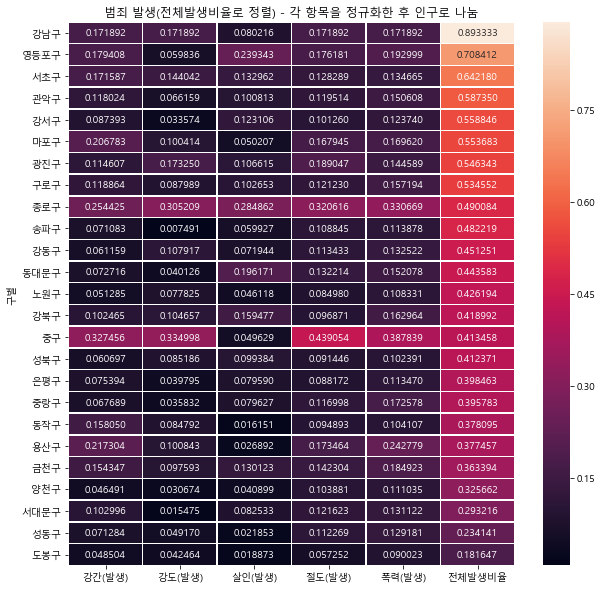

In [16]:
#각 범죄의 최댓값으로 각 칼럼을 나눠 정규화
target = ['강간(발생)', '강도(발생)', '살인(발생)', '절도(발생)', '폭력(발생)']
df5 = df3[target].max()
df6 = df3[target]/df5

df7 = df6.div(df3['인구수'],axis=0)*100000 #범죄건수를 인구수로 나눠 발생비율을 사용
df7['전체발생비율'] = df6.mean(axis=1) #발생 비율의 평균으로 전체발생비율 컬럼 생성

plt.figure(figsize = (10,10)) # 크기 조정
#전체발생비율을 정렬 후 종합적으로 볼 수 있게 시각화
# annot: 각 셀에 값을 표시 fmt = 'f' : 실수 형태 linewidths : 셀의 간격
sns.heatmap(df7.sort_values(by='전체발생비율', ascending=False), annot=True, fmt='f', linewidths=.5)
plt.title('범죄 발생(전체발생비율로 정렬) - 각 항목을 정규화한 후 인구로 나눔')
plt.show()

## 3. 구 별 검거율을 지도로 시각화

In [17]:
import json #json파일을 읽어 파싱
import folium #지도 함수
import warnings #경고 메세지를 출력 
warnings.simplefilter(action = "ignore", category = FutureWarning) #pandas future 경고를 억제

#서울 지도 데이터만 따로 추출한 파일
geo_path = 'C:/Users/woals/Desktop/ipython_fold/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

#서울 각 구 별 검거율 시각화
map.choropleth(geo_data = geo_str,
               data = df3['검거율'],
               columns = [df3.index, df3['검거율']],
               fill_color = 'YlGnBu', #PuRd, YlGnBu
               key_on = 'feature.id')
map

## 4. 구 별 범죄 전체 발생 비율을 지도로 시각화

In [18]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

#서울 각 구 별 전체 범죄발생비율 시각화
map.choropleth(geo_data = geo_str,
               data = df7['전체발생비율'],
               columns = [df7.index, df7['전체발생비율']],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'feature.id')
map

## 5. CCTV의 위치를 지도에 표시

In [19]:
#cctv 데이터를 각 구마다 불러옴 (마포구는 cctv의 위도 경도가 없음)
Gangnamgu = pd.read_csv("서울특별시_강남구_CCTV_20190312.csv",engine='python') #강남 1881
Gangdonggu = pd.read_csv("서울특별시_강동구_CCTV_20190521.csv",engine='python') #강동 876
Gangbukgu = pd.read_csv("서울특별시_강북구_CCTV_20190426.csv",engine='python') #강북 1774
Gangseogu = pd.read_csv("서울특별시_강서구_CCTV_20190307.csv",engine='python') #강서 885
Gwanakgu = pd.read_csv("서울특별시_관악구_CCTV_20180630.csv",engine='python') #관악 1263
Gwangjingu = pd.read_csv("서울특별시_광진구_CCTV_20190306.csv",engine='python') #광진 957
Gurogu = pd.read_csv("서울특별시_구로구_CCTV_20190503.csv",engine='python') #구로 1283
Geumcheongu = pd.read_csv("서울특별시_금천구_CCTV_20180809.csv",engine='python') #금천 484
Nowongu = pd.read_csv("서울특별시_노원구_CCTV_20190408.csv",engine='python') #노원 1614
Dobonggu = pd.read_csv("서울특별시_도봉구_CCTV_20181006.csv",engine='python') #도봉 615
Dongdaemungu = pd.read_csv("서울특별시_동대문구_CCTV_20190401.csv",engine='python') #동대문 725
Dongjakgu = pd.read_csv("서울특별시_동작구_CCTV_20190516.csv",engine='python') #동작 672
Mapogu = pd.read_csv("서울특별시_마포구_CCTV_20170425.csv",engine='python') #마포 682 위도와 경도가 없음
Seodaemungu = pd.read_csv("서울특별시_서대문구_CCTV_20180809.csv",engine='python') #서대문 590
Seochogu = pd.read_csv("서울특별시_서초구_CCTV_20180629.csv",engine='python') #서초 672
Seongdonggu = pd.read_csv("서울특별시_성동구_CCTV_20180817.csv",engine='python') #성동 985
Seongbukgu = pd.read_csv("서울특별시_성북구_CCTV_20181031.csv",engine='python') #성북 1115
Songpagu = pd.read_csv("서울특별시_송파구_CCTV_20180630.csv",engine='python') #송파 909
Yangcheongu = pd.read_csv("서울특별시_양천구_CCTV_20190219.csv",engine='python') #양천 844
Yeongdeungpogu = pd.read_csv("서울특별시_영등포구_CCTV_20190430.csv",engine='python') #영등포1083 
Yongsangu = pd.read_csv("서울특별시_용산구_CCTV_20190129.csv",engine='python') #용산 670
Eunpyeonggu = pd.read_csv("서울특별시_은평구_CCTV_20190101.csv",engine='python') #은평 1077
Jongnogu = pd.read_csv("서울특별시_종로구_CCTV_20190110.csv",engine='python') #종로 655
Junggu = pd.read_csv("서울특별시_중구_CCTV_20190109.csv",engine='python') #중구 743
Jungnanggu =pd.read_csv("서울특별시_중랑구_CCTV_20190307.csv",engine='python') #중랑 860

#데이터의 양이 너무 많아서 원하는 구만 입력 받습니다.
x = input('보고싶은 구를 입력하시오 : ')

#각 구의 시청으로 시작으로 지도에 cctv 표시 
if x == 'Gangnam' or x == 'gangnam' or x == 'Gangnamgu' or x == 'gangnamgu':
    map = foliumfl.Map(location=[37.4968281,126.9978994],zoom_start=16) #구청 시작
    for i in range(0,1779):
        folium.Marker([Gangnamgu["위도"][i],Gangnamgu["경도"][i]], popup="CCTV").add_to(map)
elif x == 'Gangdong' or x == 'gangdong' or x == 'Gangdonggu' or x == 'gangdonggu':
    map = folium.Map(location=[37.4967867,126.9978993],zoom_start=16) #구청 시작
    for i in range(0,874):
        folium.Marker([Gangbukgu["위도"][i],Gangbukgu["경도"][i]], popup="CCTV").add_to(map)     
elif x == 'Gangbuk' or x == 'gangbuk' or x == 'Gangbukgu' or x == 'gangbukgu':
    map = folium.Map(location=[37.6397767,127.0233297],zoom_start=16) #구청 시작
    for i in range(0,1772):
        folium.Marker([Gangbukgu["위도"][i],Gangbukgu["경도"][i]], popup="CCTV").add_to(map)
elif x == 'Gangseo' or x == 'gangseo' or x == 'Gangseogu' or x == 'gangseogu':
    map = folium.Map(location=[37.4964352,126.7877556],zoom_start=16) #구청 시작
    for i in range(0,883):
        folium.Marker([Gangseogu["위도"][i],Gangseogu["경도"][i]], popup="CCTV").add_to(map)
elif x == 'Gwanak' or x == 'gwanak' or x == 'Gwanakgu' or x == 'gwanakgu':
    map = folium.Map(location=[37.4781285,126.9493137],zoom_start=16) #구청 시작
    for i in range(0,1261):
        folium.Marker([Gwanakgu["위도"][i],Gwanakgu["경도"][i]], popup="CCTV").add_to(map)
elif x == 'Gwangjin' or  x == 'gwangjin' or x == 'Gwangjingu' or x == 'gwagjingu' :
    map = folium.Map(location=[37.5385333,127.0823772],zoom_start=16) #구청 시작
    for i in range(0,955):
        folium.Marker([Gwangjingu["위도"][i],Gwangjingu["경도"][i]], popup="CCTV").add_to(map)
elif x == 'Guro' or  x == 'guro' or x == 'Gurogu' or x == 'gurogu' :
    map = folium.Map(location=[37.4954703,126.8854504],zoom_start=16) #구청 시작
    for i in range(0,1281):
        folium.Marker([Gurogu["위도"][i],Gurogu["경도"][i]], popup="CCTV").add_to(map)
elif x == 'Geumcheon' or  x == 'geumcheon' or x == 'Geumcheongu' or x == 'geumcheongu' :
    map = folium.Map(location=[37.4599845,126.8662471],zoom_start=16) #구청 시작
    for i in range(0,482):
        folium.Marker([Geumcheongu["위도"][i],Geumcheongu["경도"][i]], popup="CCTV").add_to(map)
elif x == 'Nowon' or  x == 'nowon' or x == 'Nowongu' or x == 'nowongu' :
    map = folium.Map(location=[37.6540471,127.0563372],zoom_start=16) #구청 시작
    for i in range(0,1612):
        folium.Marker([Nowongu["위도"][i],Nowongu["경도"][i]], popup="CCTV").add_to(map)
elif x == 'Dobong' or  x == 'dobong' or x == 'Dobonggu' or x == 'dobonggu':
    map = folium.Map(location=[37.6662953,126.9948531],zoom_start=16) #구청 시작
    for i in range(0,613):
        folium.Marker([Dobonggu["위도"][i],Dobonggu["경도"][i]], popup="CCTV").add_to(map)
elif x == 'Dongdaemun' or  x == 'dongdaemun' or x == 'Dongdaemungu' or x == 'dongdaemungu':
    map = folium.Map(location=[37.5744197,127.037554],zoom_start=16) #구청 시작
    for i in range(0,723):
        folium.Marker([Dongdaemungu["위도"][i],Dongdaemungu["경도"][i]], popup="CCTV").add_to(map) 
elif x == 'Dongjak' or  x == 'dongjak' or x == 'Dongjakgu' or x == 'dongjakgu':
    map = folium.Map(location=[37.4599741,126.8662471],zoom_start=16) #구청 시작
    for i in range(0,670):
        folium.Marker([Dongjakgu["위도"][i],Dongjakgu["경도"][i]], popup="CCTV").add_to(map) 
elif x == 'Mapo' or x == 'mapo' or x == 'Mapogu' or x == 'mapogu':
    map = folium.Map(location=[37.5615756,126.838603],zoom_start=16) #구청 시작
    #for i in range(0,670):
    #    folium.Marker([Mapogu["위도"][i],Mapogu["경도"][i]], popup="CCTV").add_to(map)        
    print("마포구는 cctv데이터가 없습니다.")
elif x == 'Seodaemun' or  x == 'seodaemun' or x == 'Seodaemungu' or x == 'seodaemungu' :
    map = folium.Map(location=[37.579177,126.9345928],zoom_start=16) #구청 시작
    for i in range(0,588):
        folium.Marker([Seodaemungu["위도"][i],Seodaemungu["경도"][i]], popup="CCTV").add_to(map) 
elif x == 'Seocho' or  x == 'seocho' or x == 'Seochogu' or x == 'seochogu' :
    map = folium.Map(location=[37.483574,127.0304723],zoom_start=16) #구청 시작
    for i in range(0,670):
        folium.Marker([Seochogu["위도"][i],Seochogu["경도"][i]], popup="CCTV").add_to(map)    
elif x == 'Seongdong' or  x == 'seongdong' or x == 'Seongdonggu' or x == 'seongdonggu'  :
    map = folium.Map(location=[37.5792966,126.8667416],zoom_start=16) #구청 시작
    for i in range(0,983):
        folium.Marker([Seongdonggu["위도"][i],Seongdonggu["경도"][i]], popup="CCTV").add_to(map)
elif x == 'Seongbuk' or  x == 'seongbuk' or x == 'Seongbukgu' or x == 'seongbukgu' :
    map = folium.Map(location=[37.5893702,127.0145543],zoom_start=16) #구청 시작
    for i in range(0,1113):
        folium.Marker([Seongbukgu["위도"][i],Seongbukgu["경도"][i]], popup="CCTV").add_to(map) 
elif x == 'Songpagu' or  x == 'Songpagu' or x == 'Songpagu' or x == 'Songpagu' :
    map = folium.Map(location=[37.4835533,126.9626211],zoom_start=16) #구청 시작
    for i in range(0,907):
        folium.Marker([Songpagu["위도"][i],Songpagu["경도"][i]], popup="CCTV").add_to(map)
elif x == 'Yangcheon' or  x == 'yangcheon' or x == 'Yangcheongu' or x == 'yangcheongu' :
    map = folium.Map(location=[37.5250527,126.8095888],zoom_start=16) #구청 시작
    for i in range(0,842):
        folium.Marker([Yangcheongu["위도"][i],Yangcheongu["경도"][i]], popup="CCTV").add_to(map) 
elif x == 'Yeongdeungpo' or  x == 'yeongdeungpo' or x == 'Yeongdeungpogu' or x == 'yeongdeungpogu' :
    map = folium.Map(location=[37.5274755,126.8931754],zoom_start=16) #구청 시작
    for i in range(0,1081):
        folium.Marker([Yeongdeungpogu["위도"][i],Yeongdeungpogu["경도"][i]], popup="CCTV").add_to(map) 
elif x == 'Yongsan'  or  x == 'yongsan' or x == 'Yongsangu' or x == 'yongsangu'  :
    map = folium.Map(location=[37.5325938,126.9878542],zoom_start=16) #구청 시작
    for i in range(0,668):
        folium.Marker([Yongsangu["위도"][i],Yongsangu["경도"][i]], popup="CCTV").add_to(map) 
elif x == 'Eunpyeong' or  x == 'eunpyeong' or x == 'Eunpyeonggu' or x == 'eunpyeonggu'   :
    map = folium.Map(location=[37.6027538,126.9270499],zoom_start=16) #구청 시작
    for i in range(0,1075):
        folium.Marker([Eunpyeonggu["위도"][i],Eunpyeonggu["경도"][i]], popup="CCTV").add_to(map)
elif x == 'Jongno' or  x == 'jongno' or x == 'Jongnogu' or x == 'jongnogu' :
    map = folium.Map(location=[37.5727906,126.9769891],zoom_start=16) #구청 시작
    for i in range(0,653):
        folium.Marker([Jongnogu["위도"][i],Jongnogu["경도"][i]], popup="CCTV").add_to(map)
elif x == 'Jung' or  x == 'jung' or x == 'Junggu' or x == 'junggu'  : 
    map = folium.Map(location=[37.5637626,126.995363],zoom_start=16) #구청 시작
    for i in range(0,741):
         folium.Marker([Junggu["위도"][i],Junggu["경도"][i]], popup="CCTV").add_to(map) 
elif x == 'Jungnang' or  x == 'jungnang' or x == 'Jungnanggu' or x == 'jungnanggu'   :
    map = folium.Map(location=[37.5950824,127.0781966],zoom_start=16) #구청 시작
    for i in range(0,858):
         folium.Marker([Jungnanggu["위도"][i],Jungnanggu["경도"][i]], popup="CCTV").add_to(map)
else :
        print("구 이름을 잘 못 입력하셨습니다.")

#원하는 구의 cctv위치와 그 구의 범죄 발생비율을 한눈에 볼 수 있음
map

보고싶은 구를 입력하시오 : seongbuk


## 6. 구 별 CCTV 개수를 파악하여 개수 대비 검거율 그래프 그리기

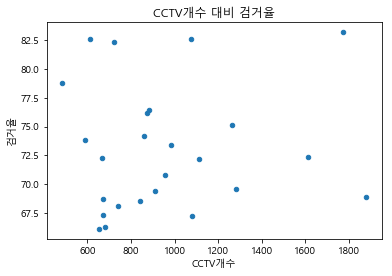

In [20]:
#구 별 cctv 개수 파악
index_len = [len(Gangnamgu.index),len(Gangdonggu.index),len(Gangbukgu.index),len(Gangseogu.index),len(Gwanakgu.index),
            len(Gwangjingu.index),len(Gurogu.index),len(Geumcheongu.index),len(Nowongu.index),len(Dobonggu.index),
            len(Dongdaemungu.index),len(Dongjakgu.index),len(Mapogu.index),len(Seodaemungu.index),len(Seochogu.index),
            len(Seongdonggu.index),len(Seongbukgu.index),len(Songpagu.index),len(Yangcheongu.index),len(Yeongdeungpogu.index),
            len(Yongsangu.index),len(Eunpyeonggu.index),len(Jongnogu.index),len(Junggu.index),len(Jungnanggu.index)]

#cctv 개수 칼럼 생성
df3['CCTV개수'] = index_len

#CCTV 개수 대비 검거율 그래프로 표시
df3.plot.scatter(x='CCTV개수',y='검거율')
plt.title("CCTV개수 대비 검거율")
plt.xlabel("CCTV개수")
plt.ylabel("검거율")
plt.show()

## 7. CCTV개수 와 검거율 선형적 상관관계를 그래프에 추가

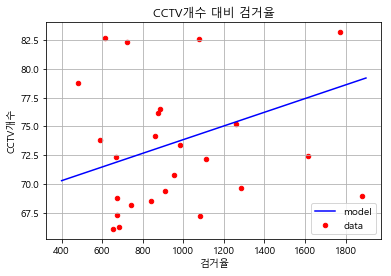

In [21]:
#cctv 개수와 검거율의 선형적 상관관계를 파악
#cctv 개수가 많으면 검거율이 높다??
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train,X_test,y_train,y_test = train_test_split(df3['CCTV개수'].tolist(),df3['검거율'].tolist(),random_state=42)

X_train = np.array(X_train)
y_train = np.array(y_train)

lr = LinearRegression().fit(X_train.reshape(X_train.size,1),y_train.reshape(y_train.size,1)) #선형 회귀로 예측함수 추정

line = np.linspace(400,1900,1800).reshape(-1,1) # 예측 모델 범위 

#선형적 상관관계 파악을 위한 모델 과 cctv개수 대비 검거율 그래프 그리기
df3.plot.scatter(x='CCTV개수',y='검거율',color = 'red')
plt.plot(line,lr.predict(line), color='blue')
plt.title("CCTV개수 대비 검거율")
plt.xlabel("검거율")
plt.ylabel("CCTV개수")
plt.legend(["model","data"],loc="best")
plt.grid()
plt.show()